In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
# Read College BB Data

college_bb_df = pd.read_csv('cbb.csv')
college_bb_df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,27.5,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,27.8,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,28.7,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,28.9,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023


In [3]:
# Function to add numerical RANK column to data based on POSTSEASON column.
#     'Champions' -> 1; '2ND' -> 2; ...; 'R68' -> 8; NaN -> 9

def categorize_ranking(rank):
    match rank:
        case 'Champions':
            return 1
        case '2ND':
            return 2
        case 'F4':
            return 3
        case 'E8':
            return 4
        case 'S16':
            return 5
        case 'R32':
            return 6
        case 'R64':
            return 7
        case 'R68':
            return 8
        case _:
            return 9

college_bb_df['RANK'] = college_bb_df['POSTSEASON'].apply(categorize_ranking)


# Add WIN_RATE column.
college_bb_df['WIN_RATE'] = round(college_bb_df['W'] / college_bb_df['G'], 4)


college_bb_df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,RANK,WIN_RATE
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,2,0.8250
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015,2,0.9000
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018,2,0.8250
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019,2,0.8158
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017,2,0.9487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023,9,0.7941
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023,9,0.8182
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023,9,0.8235
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023,9,0.7632


In [4]:
# Function to calculate, display, and return the polynomial object for a cubic spline.

def plot_cubic_spline(uni_df, uni_name, x_col, y_col, x1, x2, polynomial_color = 'blue', point_color = 'red', show_legend = True):

    polynomial = CubicSpline(x = uni_df[x_col].values, y = uni_df[y_col].values)
    poly_x = np.arange(x1, x2 + 0.1, 0.1)
    poly_y = polynomial(poly_x)

    plt.plot(poly_x, poly_y, label = uni_name + ' ' + y_col + ' Interpolation', color = polynomial_color)
    plt.scatter(uni_df[x_col], uni_df[y_col], label = 'True ' + uni_name + ' ' + y_col, color = point_color)

    plt.title(uni_name + ' ' + y_col + ' Cubic Interpolation')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    if show_legend:
        plt.legend(loc = 'upper left', fontsize = 'small');

    return polynomial

Text(0.5, 1.0, 'UConn + Kansas ADJOE Over Time')

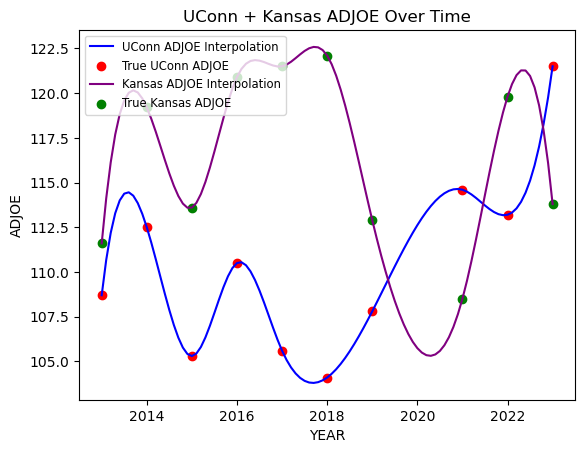

In [5]:
# Example of Functionality - Visualize some features relating to specific teams.

uconn_df = college_bb_df[college_bb_df['TEAM'] == 'Connecticut']
uconn_df = uconn_df.sort_values(by = 'YEAR', ascending = True)

kansas_df = college_bb_df[college_bb_df['TEAM'] == 'Kansas']
kansas_df = kansas_df.sort_values(by = 'YEAR', ascending = True)

uconn_polynomial_adjoe = plot_cubic_spline(uconn_df, 'UConn', 'YEAR', 'ADJOE', 2013, 2023)
kansas_polynomial_adjoe = plot_cubic_spline(kansas_df, 'Kansas', 'YEAR', 'ADJOE', 2013, 2023, 'purple', 'green')

plt.title('UConn + Kansas ADJOE Over Time')

# Best Teams in Each Rank, per Year
---

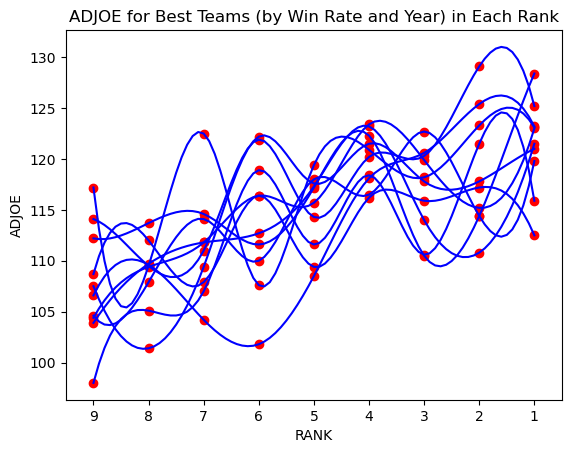

In [6]:
# Seperate data by year, select the best team per rank based on win rate, then create visualizations.

for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', 'ADJOE', 1, 9, show_legend = False)
    plt.title('ADJOE for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

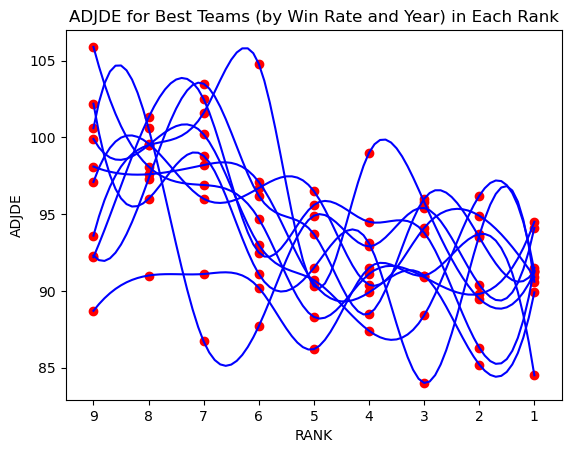

In [7]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', 'ADJDE', 1, 9, show_legend = False)
    plt.title('ADJDE for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

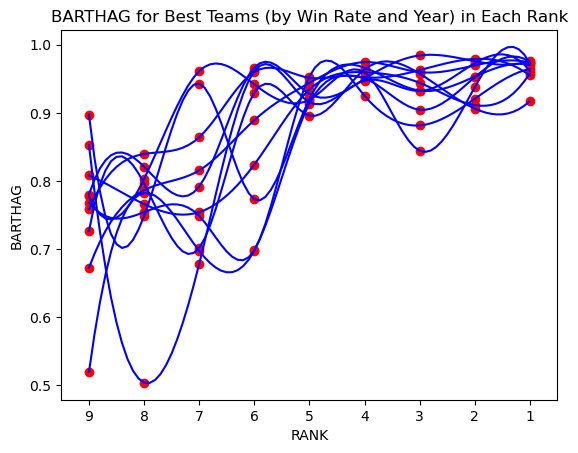

In [8]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', 'BARTHAG', 1, 9, show_legend = False)
    plt.title('BARTHAG for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

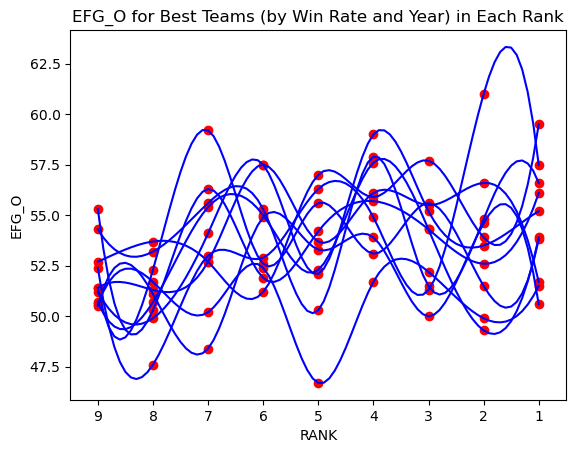

In [9]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', 'EFG_O', 1, 9, show_legend = False)
    plt.title('EFG_O for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

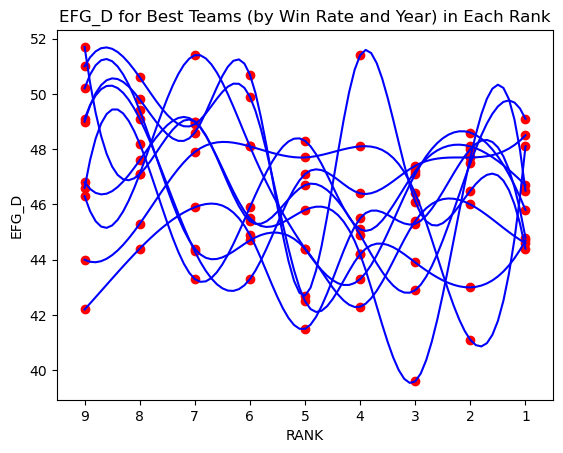

In [10]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', 'EFG_D', 1, 9, show_legend = False)
    plt.title('EFG_D for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

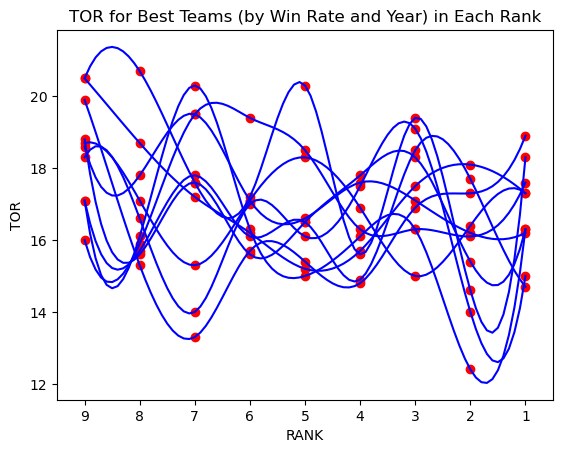

In [11]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', 'TOR', 1, 9, show_legend = False)
    plt.title('TOR for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

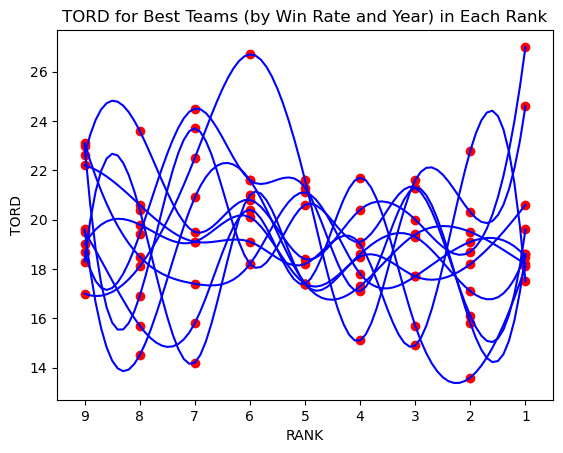

In [12]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', 'TORD', 1, 9, show_legend = False)
    plt.title('TORD for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

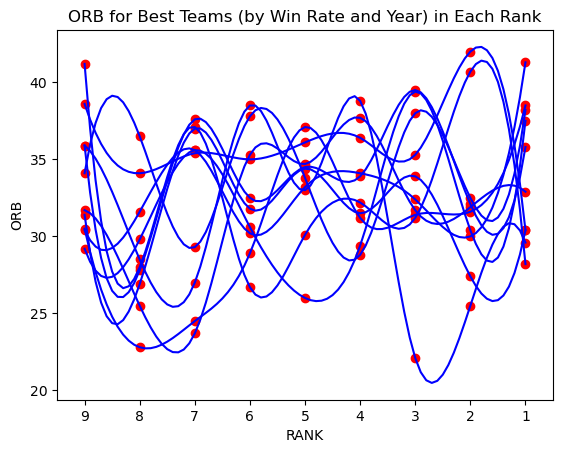

In [13]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', 'ORB', 1, 9, show_legend = False)
    plt.title('ORB for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

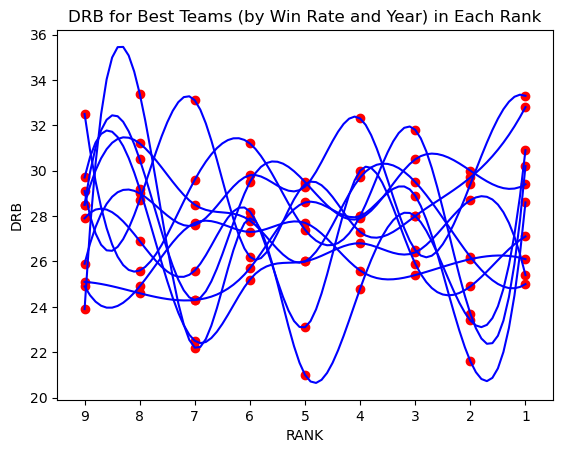

In [14]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', 'DRB', 1, 9, show_legend = False)
    plt.title('DRB for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

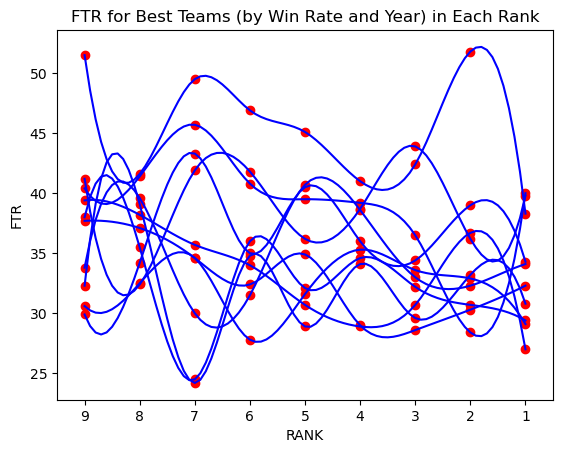

In [15]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', 'FTR', 1, 9, show_legend = False)
    plt.title('FTR for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

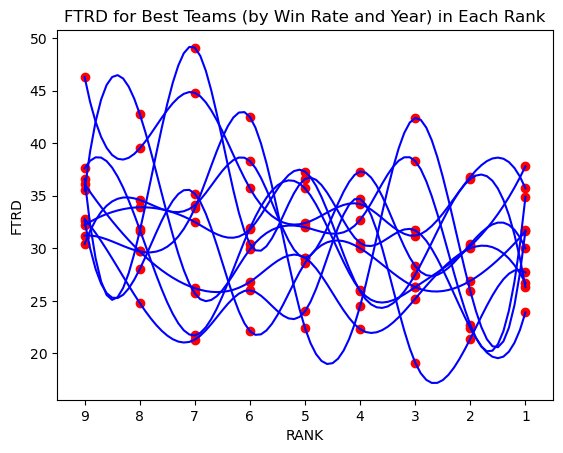

In [16]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', 'FTRD', 1, 9, show_legend = False)
    plt.title('FTRD for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

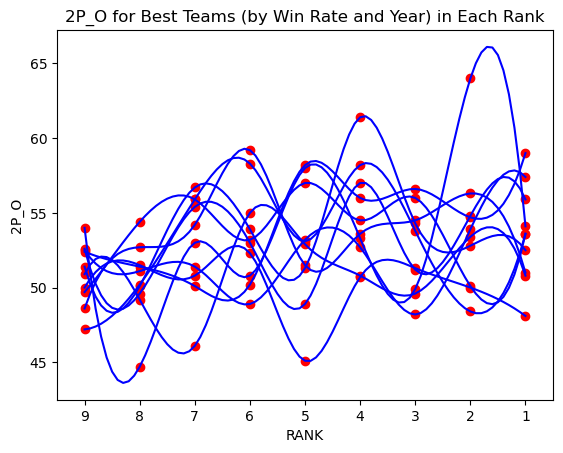

In [17]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', '2P_O', 1, 9, show_legend = False)
    plt.title('2P_O for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

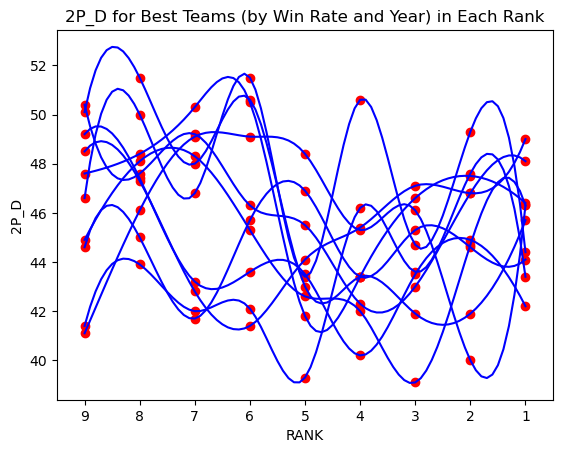

In [18]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', '2P_D', 1, 9, show_legend = False)
    plt.title('2P_D for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

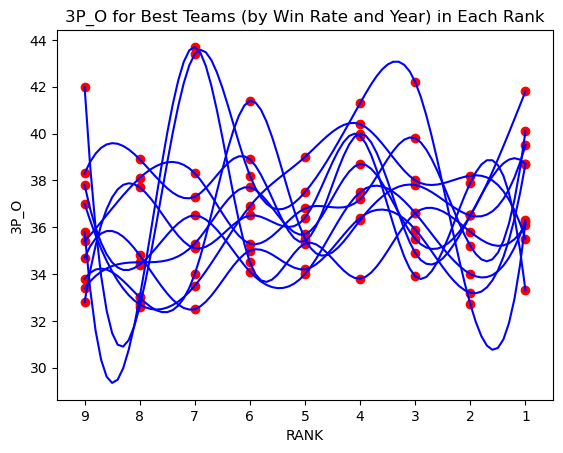

In [19]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', '3P_O', 1, 9, show_legend = False)
    plt.title('3P_O for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

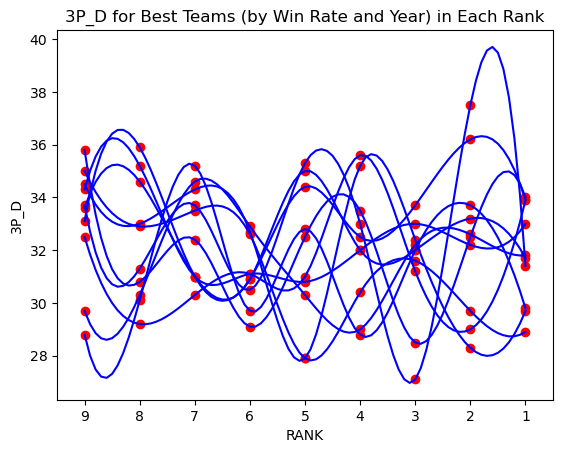

In [20]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', '3P_D', 1, 9, show_legend = False)
    plt.title('3P_D for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

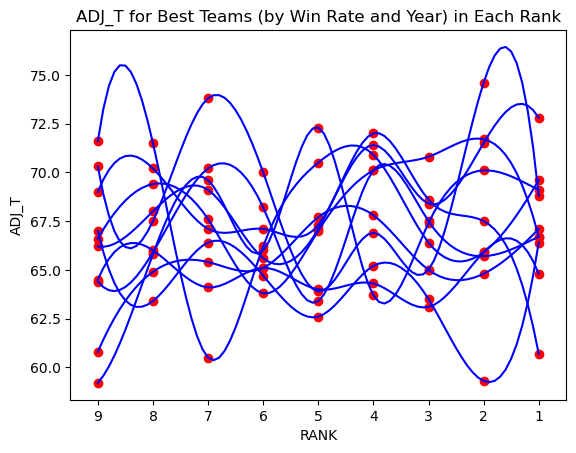

In [21]:
for year in [x for x in range(2013, 2024) if x != 2020]:

    sorted_df = college_bb_df[college_bb_df['YEAR'] == year].sort_values(['RANK', 'WIN_RATE'])
    sorted_df = sorted_df.loc[sorted_df.groupby('RANK')['WIN_RATE'].idxmax()]

    overall_adjoe = plot_cubic_spline(sorted_df, 'Unis w/ Best Win Rate (' + str(year) + ')', 'RANK', 'ADJ_T', 1, 9, show_legend = False)
    plt.title('ADJ_T for Best Teams (by Win Rate and Year) in Each Rank')
    plt.xlim(9.5, 0.5)

# UConn Analysis
---

In [22]:
# Recall our UConn data.

uconn_df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,RANK,WIN_RATE
1869,Connecticut,BE,30,20,108.7,93.9,0.8425,50.0,45.3,18.2,...,44.4,34.0,31.5,65.3,1.5,NaN,NaN,2013,9,0.6667
12,Connecticut,Amer,40,32,112.5,91.3,0.9171,51.5,44.6,17.3,...,42.2,38.7,33.0,64.8,4.7,Champions,7.0,2014,1,0.8000
189,Connecticut,Amer,35,20,105.3,97.4,0.7109,50.0,45.2,18.6,...,42.8,35.4,33.2,62.5,-3.3,NaN,NaN,2015,9,0.5714
2049,Connecticut,Amer,36,25,110.5,93.4,0.8732,51.5,44.5,16.3,...,42.0,36.5,32.6,66.9,1.2,R32,9.0,2016,6,0.6944
205,Connecticut,Amer,32,16,105.6,98.3,0.6937,48.5,45.6,18.7,...,43.0,35.4,33.0,66.1,-5.6,NaN,NaN,2017,9,0.5000
214,Connecticut,Amer,32,14,104.1,105.8,0.4549,47.5,51.1,18.5,...,48.5,32.6,36.4,68.1,-7.0,NaN,NaN,2018,9,0.4375
223,Connecticut,Amer,33,16,107.8,101.0,0.6797,51.0,49.6,18.5,...,49.2,34.4,33.5,70.4,-5.7,NaN,NaN,2019,9,0.4848
2480,Connecticut,BE,22,15,114.6,92.8,0.9188,49.5,46.2,17.6,...,45.6,33.6,31.6,65.7,2.1,R64,7.0,2021,7,0.6818
2821,Connecticut,BE,33,23,113.2,95.9,0.8709,49.6,46.0,17.3,...,42.6,35.2,35.3,65.0,3.1,R64,5.0,2022,7,0.6970
3172,Connecticut,BE,39,31,121.5,91.2,0.9643,53.9,44.4,18.9,...,44.4,36.3,29.7,66.7,5.0,Champions,4.0,2023,1,0.7949


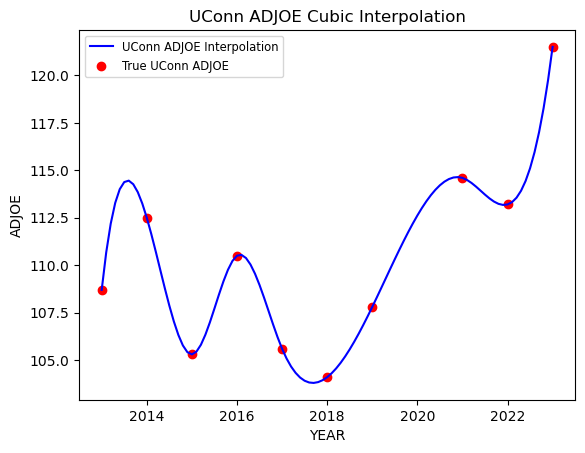

In [23]:
# Let's see how seemingly relevant stats look on them, shall we?

uconn_polynomial_adjoe = plot_cubic_spline(uconn_df, 'UConn', 'YEAR', 'ADJOE', 2013, 2023)

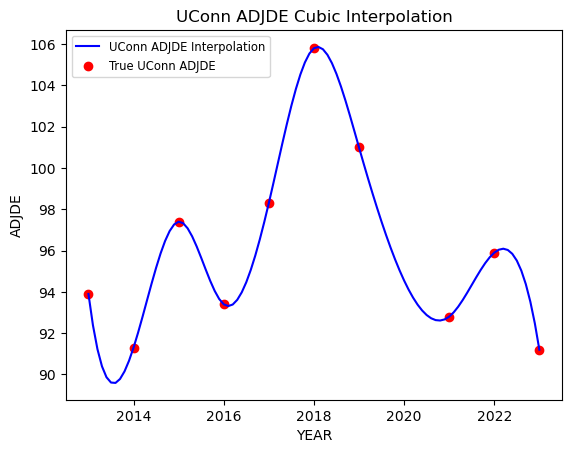

In [24]:
uconn_polynomial_adjde = plot_cubic_spline(uconn_df, 'UConn', 'YEAR', 'ADJDE', 2013, 2023)

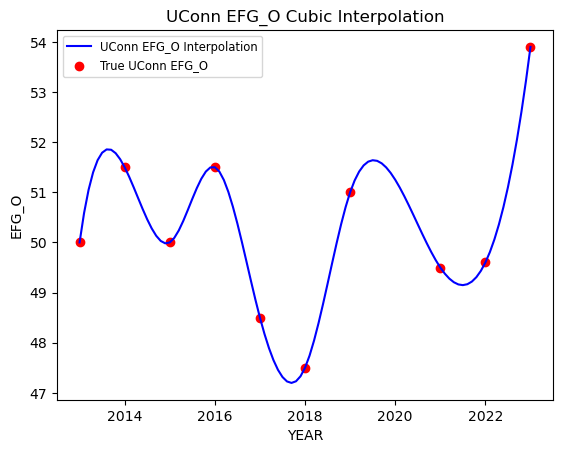

In [25]:
uconn_polynomial_efgo = plot_cubic_spline(uconn_df, 'UConn', 'YEAR', 'EFG_O', 2013, 2023)

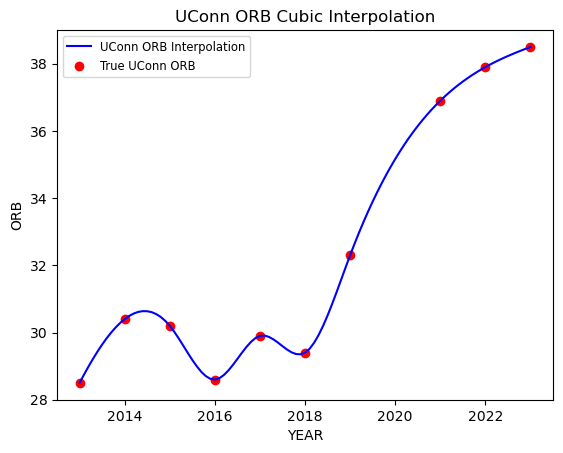

In [26]:
uconn_polynomial_orb = plot_cubic_spline(uconn_df, 'UConn', 'YEAR', 'ORB', 2013, 2023)

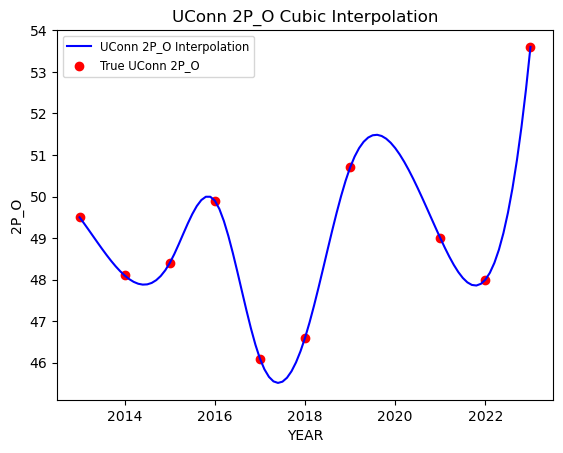

In [27]:
uconn_polynomial_2po = plot_cubic_spline(uconn_df, 'UConn', 'YEAR', '2P_O', 2013, 2023)

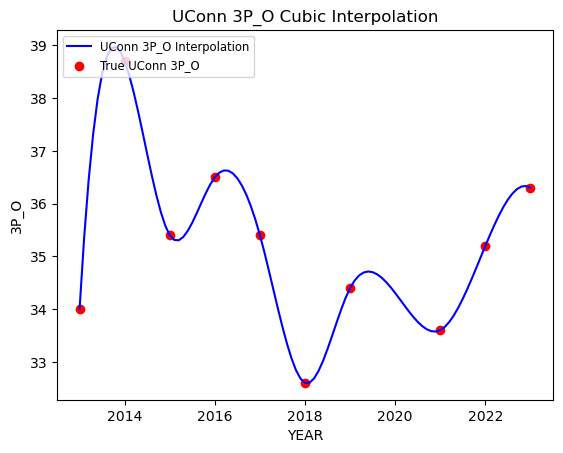

In [28]:
uconn_polynomial_3po = plot_cubic_spline(uconn_df, 'UConn', 'YEAR', '3P_O', 2013, 2023)

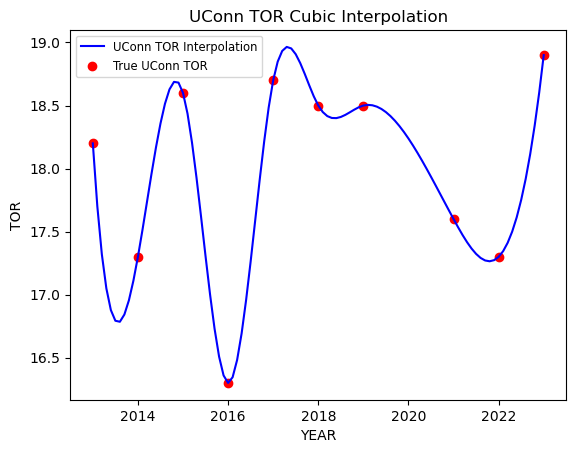

In [29]:
uconn_polynomial_tor = plot_cubic_spline(uconn_df, 'UConn', 'YEAR', 'TOR', 2013, 2023)

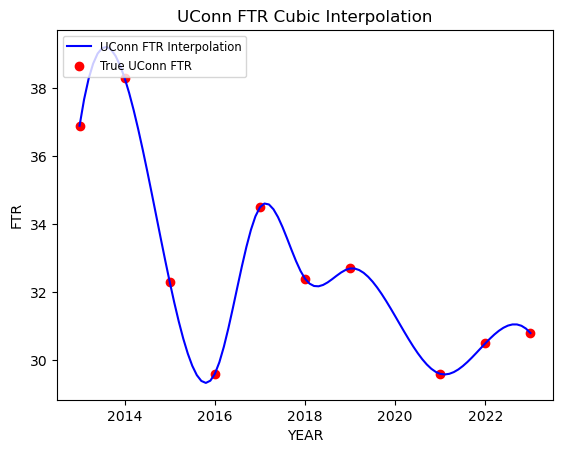

In [30]:
uconn_polynomial_ftr = plot_cubic_spline(uconn_df, 'UConn', 'YEAR', 'FTR', 2013, 2023)

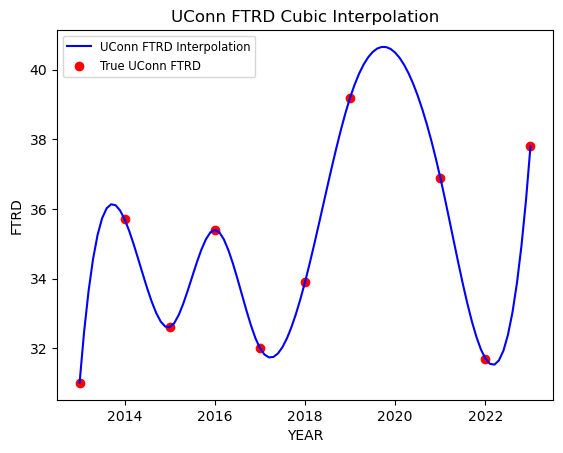

In [31]:
uconn_polynomial_ftrd = plot_cubic_spline(uconn_df, 'UConn', 'YEAR', 'FTRD', 2013, 2023)

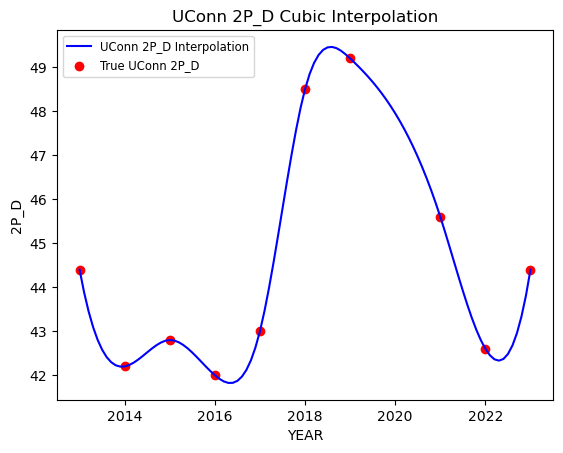

In [32]:
uconn_polynomial_2pd = plot_cubic_spline(uconn_df, 'UConn', 'YEAR', '2P_D', 2013, 2023)